In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime
import numpy
import itertools

#importa configuracion
import sys
sys.path.append("../")
from common import config, get_medicion

In [17]:
config_ = config(os.getcwd().replace("\\",'/'))
start = config_['date_init']
end = config_['date_end']

indoor =pd.read_csv("../../../indoor.csv")
outdoor =pd.read_csv("../../../outdoor.csv")
indoor['fecha_hora_med'] = pd.to_datetime(indoor['fecha_hora_med'])
outdoor['fecha_hora_med'] = pd.to_datetime(outdoor['fecha_hora_med'])
indoor.index = indoor['fecha_hora_med']
indoor.resample('1Min', closed='right').mean()

outdoor.index = outdoor['fecha_hora_med']
outdoor.resample('1Min', closed='right').mean()

indoor = indoor.loc[start: end]
outdoor = outdoor.loc[start: end]



Text(0.5, 1.0, 'RESISTENCIA Zero')

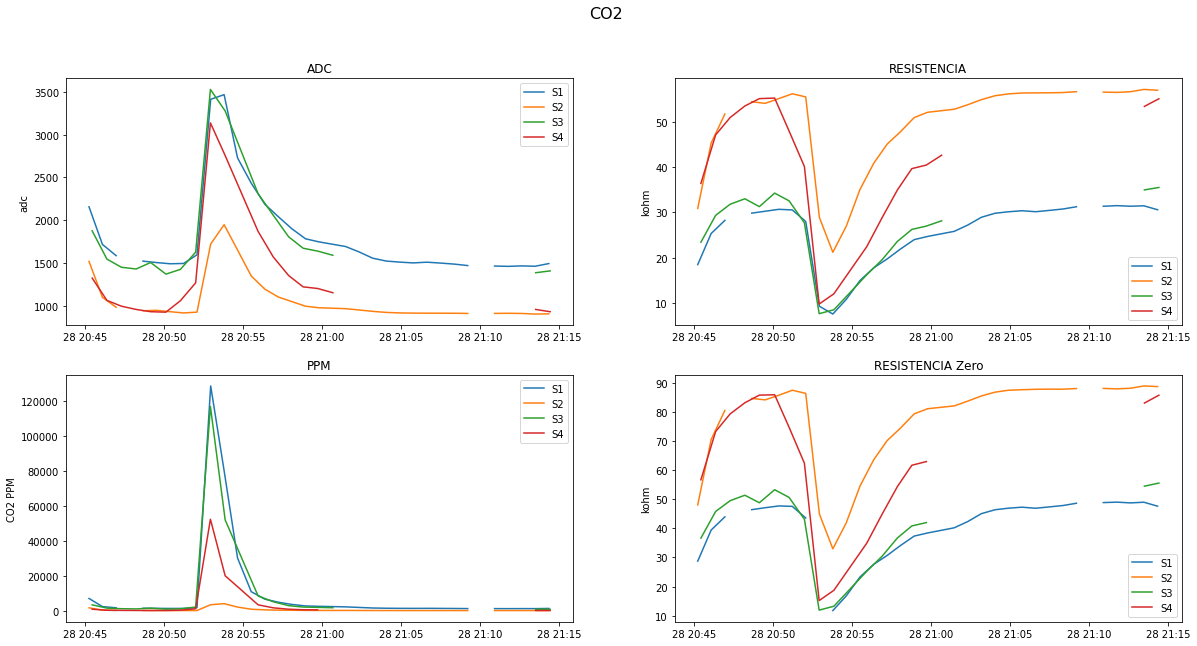

In [29]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(20,10)
fig.suptitle('CO2', fontsize=16)

axs[0, 0].plot(indoor["co2_adc_1"], label = 'S1')
axs[0, 0].plot(indoor["co2_adc_2"], label = 'S2')
axs[0, 0].plot(outdoor["co2_adc_1"], label = 'S3')
axs[0, 0].plot(outdoor["co2_adc_2"], label = 'S4')
axs[0, 0].set( ylabel='adc')
axs[0, 0].legend(fontsize = 10)
axs[0, 0].set_title('ADC')

axs[0, 1].plot(indoor["co2_res_1"], label = 'S1')
axs[0, 1].plot(indoor["co2_res_2"], label = 'S2')
axs[0, 1].plot(outdoor["co2_res_1"], label = 'S3')
axs[0, 1].plot(outdoor["co2_res_2"], label = 'S4')
axs[0, 1].set( ylabel='kohm')
axs[0, 1].legend(fontsize = 10)
axs[0, 1].set_title('RESISTENCIA' )

axs[1, 0].plot(indoor["co2_ppm_1"], label = 'S1')
axs[1, 0].plot(indoor["co2_ppm_2"], label = 'S2')
axs[1, 0].plot(outdoor["co2_ppm_1"], label = 'S3')
axs[1, 0].plot(outdoor["co2_ppm_2"], label = 'S4')
axs[1, 0].legend(fontsize = 10)
axs[1, 0].set( ylabel='CO2 PPM')
axs[1, 0].set_title('PPM')

axs[1, 1].plot(indoor["co2_rzero_1"], label = 'S1')
axs[1, 1].plot(indoor["co2_rzero_2"], label = 'S2')
axs[1, 1].plot(outdoor["co2_rzero_1"], label = 'S3')
axs[1, 1].plot(outdoor["co2_rzero_2"], label = 'S4')
axs[1, 1].legend(fontsize = 10)
axs[1, 1].set( ylabel='kohm')
axs[1, 1].set_title('RESISTENCIA Zero')


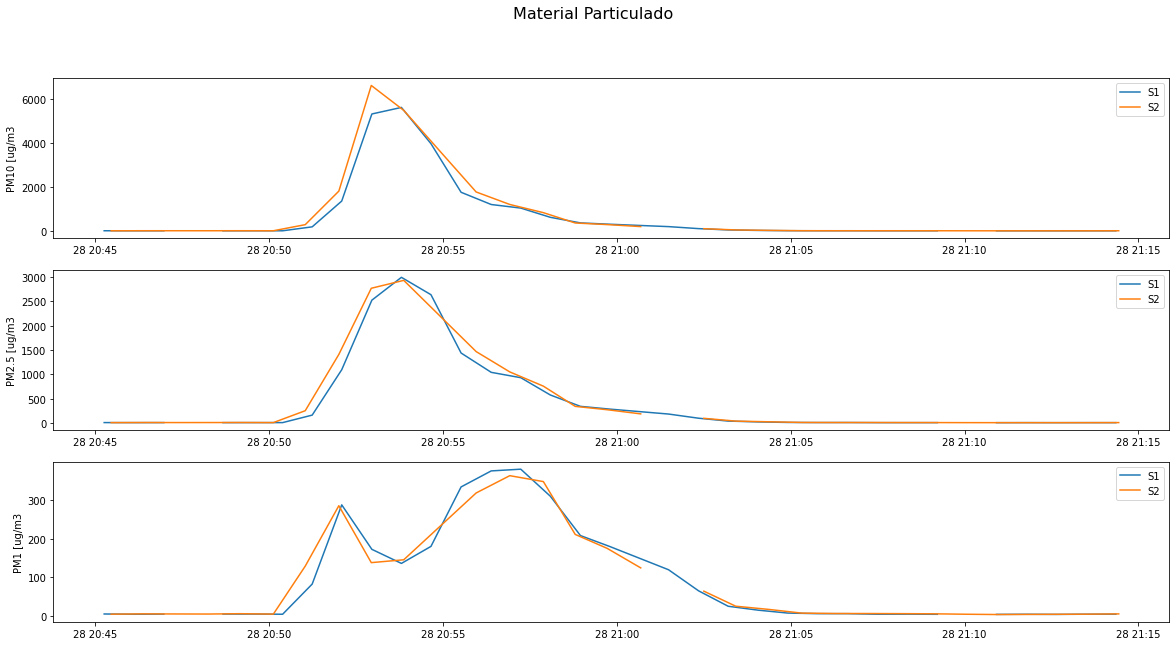

In [27]:
fig, axs = plt.subplots(3)
fig.set_size_inches(20,10)
fig.suptitle('Material Particulado', fontsize=16)

axs[0].plot(indoor["pm10_0_au"], label = 'S1')
axs[0].plot(outdoor["pm10_0_au"], label = 'S2')
axs[0].set( ylabel='PM10 [ug/m3')
axs[0].legend(fontsize = 10)
#axs[0].set_title('PM10')

axs[1].plot(indoor["pm2_5_au"], label = 'S1')
axs[1].plot(outdoor["pm2_5_au"], label = 'S2')
axs[1].set( ylabel='PM2.5 [ug/m3')
axs[1].legend(fontsize = 10)
#axs[1].set_title('PM2.5')

axs[2].plot(indoor["pm1_0_au"], label = 'S1')
axs[2].plot(outdoor["pm1_0_au"], label = 'S2')
axs[2].set(ylabel='PM1 [ug/m3')
axs[2].legend(fontsize = 10)
#axs[2].set_title('PM1')


Text(0.5, 1.0, 'Presion')

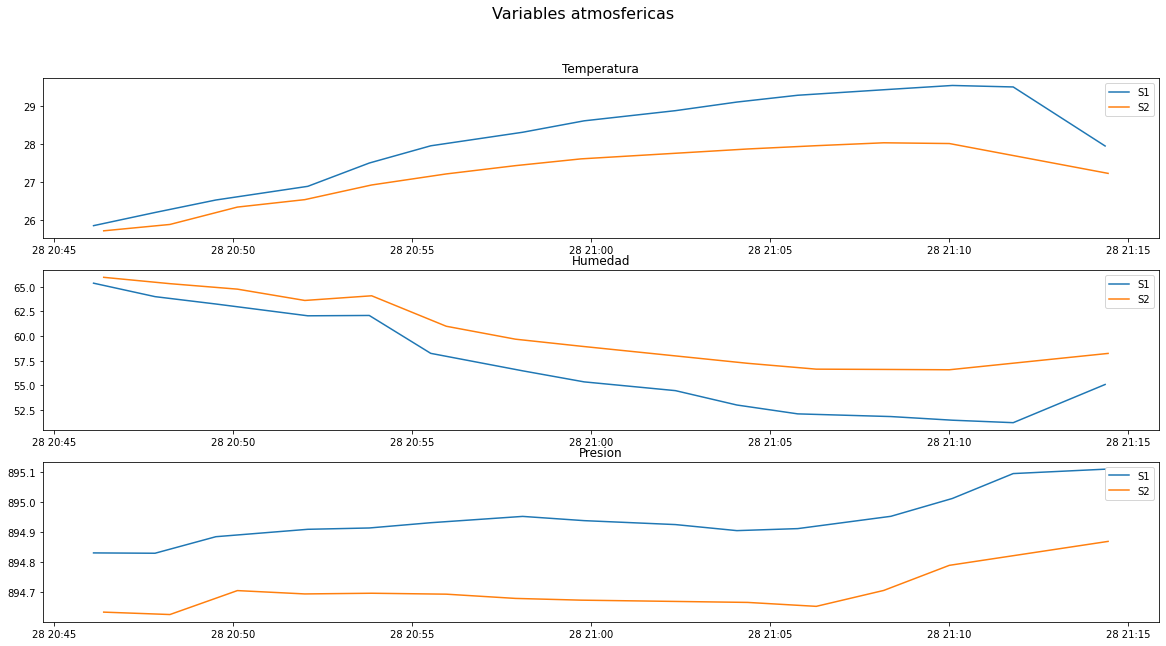

In [28]:
fig, axs = plt.subplots(3)
fig.set_size_inches(20,10)
fig.suptitle('Variables atmosfericas', fontsize=16)

axs[0].plot(indoor["t"].dropna(), label = 'S1')
axs[0].plot(outdoor["t"].dropna(), label = 'S2')
#axs[0].set( ylabel='PM10 [ug/m3')
axs[0].legend(fontsize = 10)
axs[0].set_title('Temperatura')

axs[1].plot(indoor["h"].dropna(), label = 'S1')
axs[1].plot(outdoor["h"].dropna(), label = 'S2')
#axs[1].set( ylabel='PM2.5 [ug/m3')
axs[1].legend(fontsize = 10)
axs[1].set_title('Humedad')

axs[2].plot(indoor["p"].dropna(), label = 'S1')
axs[2].plot(outdoor["p"].dropna(), label = 'S2')
#axs[2].set(ylabel='PM1 [ug/m3')
axs[2].legend(fontsize = 10)
axs[2].set_title('Presion')